# Portfolio Theory

## Imports

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

## Load Data

In [7]:
stocks = pd.read_csv("data/index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])
stocks

Price       Adj Close                                                 \
Ticker           AMZN          BA         DIS         IBM         KO   
Date                                                                   
2014-01-02  19.898500  116.807945   69.335960  112.504295  28.724297   
2014-01-03  19.822001  117.619881   69.190521  113.177422  28.583017   
2014-01-06  19.681499  118.295090   68.926888  112.789345  28.448795   
2014-01-07  19.901501  120.089897   69.399590  115.039040  28.533552   
2014-01-08  20.096001  120.354843   68.381424  113.983925  28.215658   
...               ...         ...         ...         ...        ...   
2018-12-21  68.872498  295.930267  101.705254   80.204346  39.488831   
2018-12-24  67.197998  285.834351   97.928635   77.767975  38.152325   
2018-12-26  73.544998  305.044800  103.276405   80.529648  38.965843   
2018-12-27  73.082001  308.163910  103.949753   82.257500  39.455616   
2018-12-28  73.901001  307.425415  104.710938   81.715294  39.181671   

Price                      Close                                      ...  \
Ticker           MSFT       AMZN          BA         DIS         IBM  ...   
Date                                                                  ...   
2014-01-02  31.058558  19.898500  136.669998   76.269997  177.370941  ...   
2014-01-03  30.849625  19.822001  137.619995   76.110001  178.432129  ...   
2014-01-06  30.197691  19.681499  138.410004   75.820000  177.820267  ...   
2014-01-07  30.431709  19.901501  140.509995   76.339996  181.367111  ...   
2014-01-08  29.888426  20.096001  140.820007   75.220001  179.703629  ...   
...               ...        ...         ...         ...         ...  ...   
2018-12-21  92.586563  68.872498  304.549988  104.220001  106.061188  ...   
2018-12-24  88.722107  67.197998  294.160004  100.349998  102.839386  ...   
2018-12-26  94.782715  73.544998  313.929993  105.830002  106.491394  ...   
2018-12-27  95.367104  73.082001  317.140015  106.519997  108.776291  ...   
2018-12-28  94.622482  73.901001  316.380005  107.300003  108.059273  ...   

Price             Open                                        Volume           \
Ticker             DIS         IBM         KO        MSFT       AMZN       BA   
Date                                                                            
2014-01-02   76.040001  178.977051  41.119999   37.349998   42756000  3366700   
2014-01-03   76.300003  177.657745  40.680000   37.200001   44204000  3177400   
2014-01-06   76.529999  178.919693  40.480000   36.849998   63412000  4196500   
2014-01-07   76.120003  178.193115  40.480000   36.330002   38320000  4238500   
2014-01-08   76.129997  181.003830  40.439999   36.000000   46330000  4236100   
...                ...         ...        ...         ...        ...      ...   
2018-12-21  106.470001  107.552582  47.259998  101.629997  272806000  7641700   
2018-12-24  103.230003  105.066925  47.619999   97.680000  144400000  3435300   
2018-12-26  100.489998  103.250481  45.880001   95.139999  208236000  4843400   
2018-12-27  104.410004  105.152962  46.740002   99.300003  194440000  4341100   
2018-12-28  107.279999  109.196938  47.889999  102.089996  176580000  3725200   

Price                                                
Ticker           DIS       IBM        KO       MSFT  
Date                                                 
2014-01-02   5200900   4755639  12698600   30632200  
2014-01-03   4060700   4250107  10403400   31134800  
2014-01-06   6816200   4254919  11036300   43603700  
2014-01-07   4494900   6205186  11872300   35802800  
2014-01-08  10900300   4815470  15339600   59971700  
...              ...       ...       ...        ...  
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[1257 rows x 36 colu

In [8]:
stocks = stocks["Adj Close"].copy()
stocks

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.898500,116.807945,69.335960,112.504295,28.724297,31.058558
2014-01-03,19.822001,117.619881,69.190521,113.177422,28.583017,30.849625
2014-01-06,19.681499,118.295090,68.926888,112.789345,28.448795,30.197691
2014-01-07,19.901501,120.089897,69.399590,115.039040,28.533552,30.431709
2014-01-08,20.096001,120.354843,68.381424,113.983925,28.215658,29.888426
...,...,...,...,...,...,...
2018-12-21,68.872498,295.930267,101.705254,80.204346,39.488831,92.586563
2018-12-24,67.197998,285.834351,97.928635,77.767975,38.152325,88.722107
2018-12-26,73.544998,305.044800,103.276405,80.529648,38.965843,94.782715


In [9]:
stocks.to_csv("data/port_stocks.csv")

## Creating an Equal Weighted Portfolio

In [11]:
ret = stocks.pct_change().dropna()
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064
...,...,...,...,...,...,...
2018-12-21,-0.0571,-0.0272,-0.0260,-0.0184,0.0006,-0.0323
2018-12-24,-0.0243,-0.0341,-0.0371,-0.0304,-0.0338,-0.0417
2018-12-26,0.0945,0.0672,0.0546,0.0355,0.0213,0.0683


In [12]:
ret.mean(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [13]:
no_assets = len(stocks.columns)
no_assets

6

In [14]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [18]:
ret.dot(weights)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [19]:
ret["EWP"] = ret.dot(weights)
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0008
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0106
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0020
...,...,...,...,...,...,...,...
2018-12-21,-0.0571,-0.0272,-0.0260,-0.0184,0.0006,-0.0323,-0.0267
2018-12-24,-0.0243,-0.0341,-0.0371,-0.0304,-0.0338,-0.0417,-0.0336
2018-12-26,0.0945,0.0672,0.0546,0.0355,0.0213,0.0683,0.0569


In [21]:
summary = ret.agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Ticker,,
AMZN,0.0012,0.0195
BA,0.0009,0.0147
DIS,0.0004,0.0119
IBM,-0.0002,0.0126
KO,0.0003,0.0086
MSFT,0.0010,0.0146
EWP,0.0006,0.0095


In [27]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

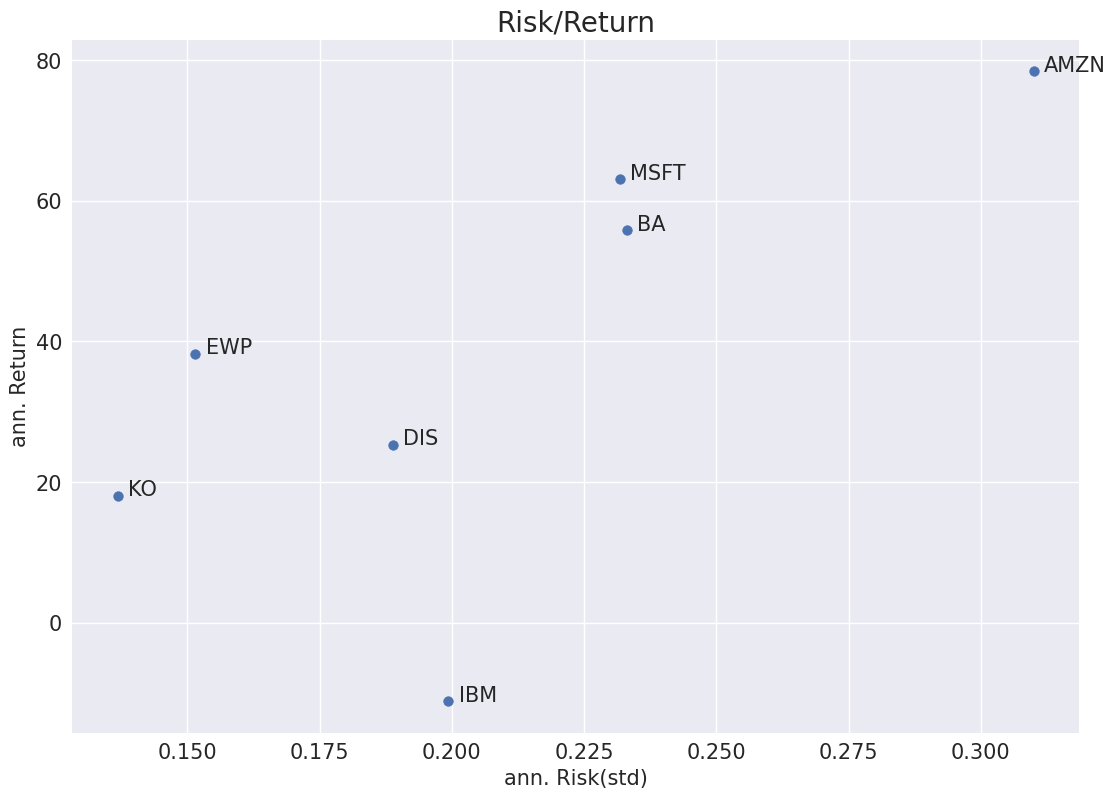

In [28]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [29]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary